In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy import signal
from skimage import transform, io
from skimage import data, exposure, measure

There are 28 'e'


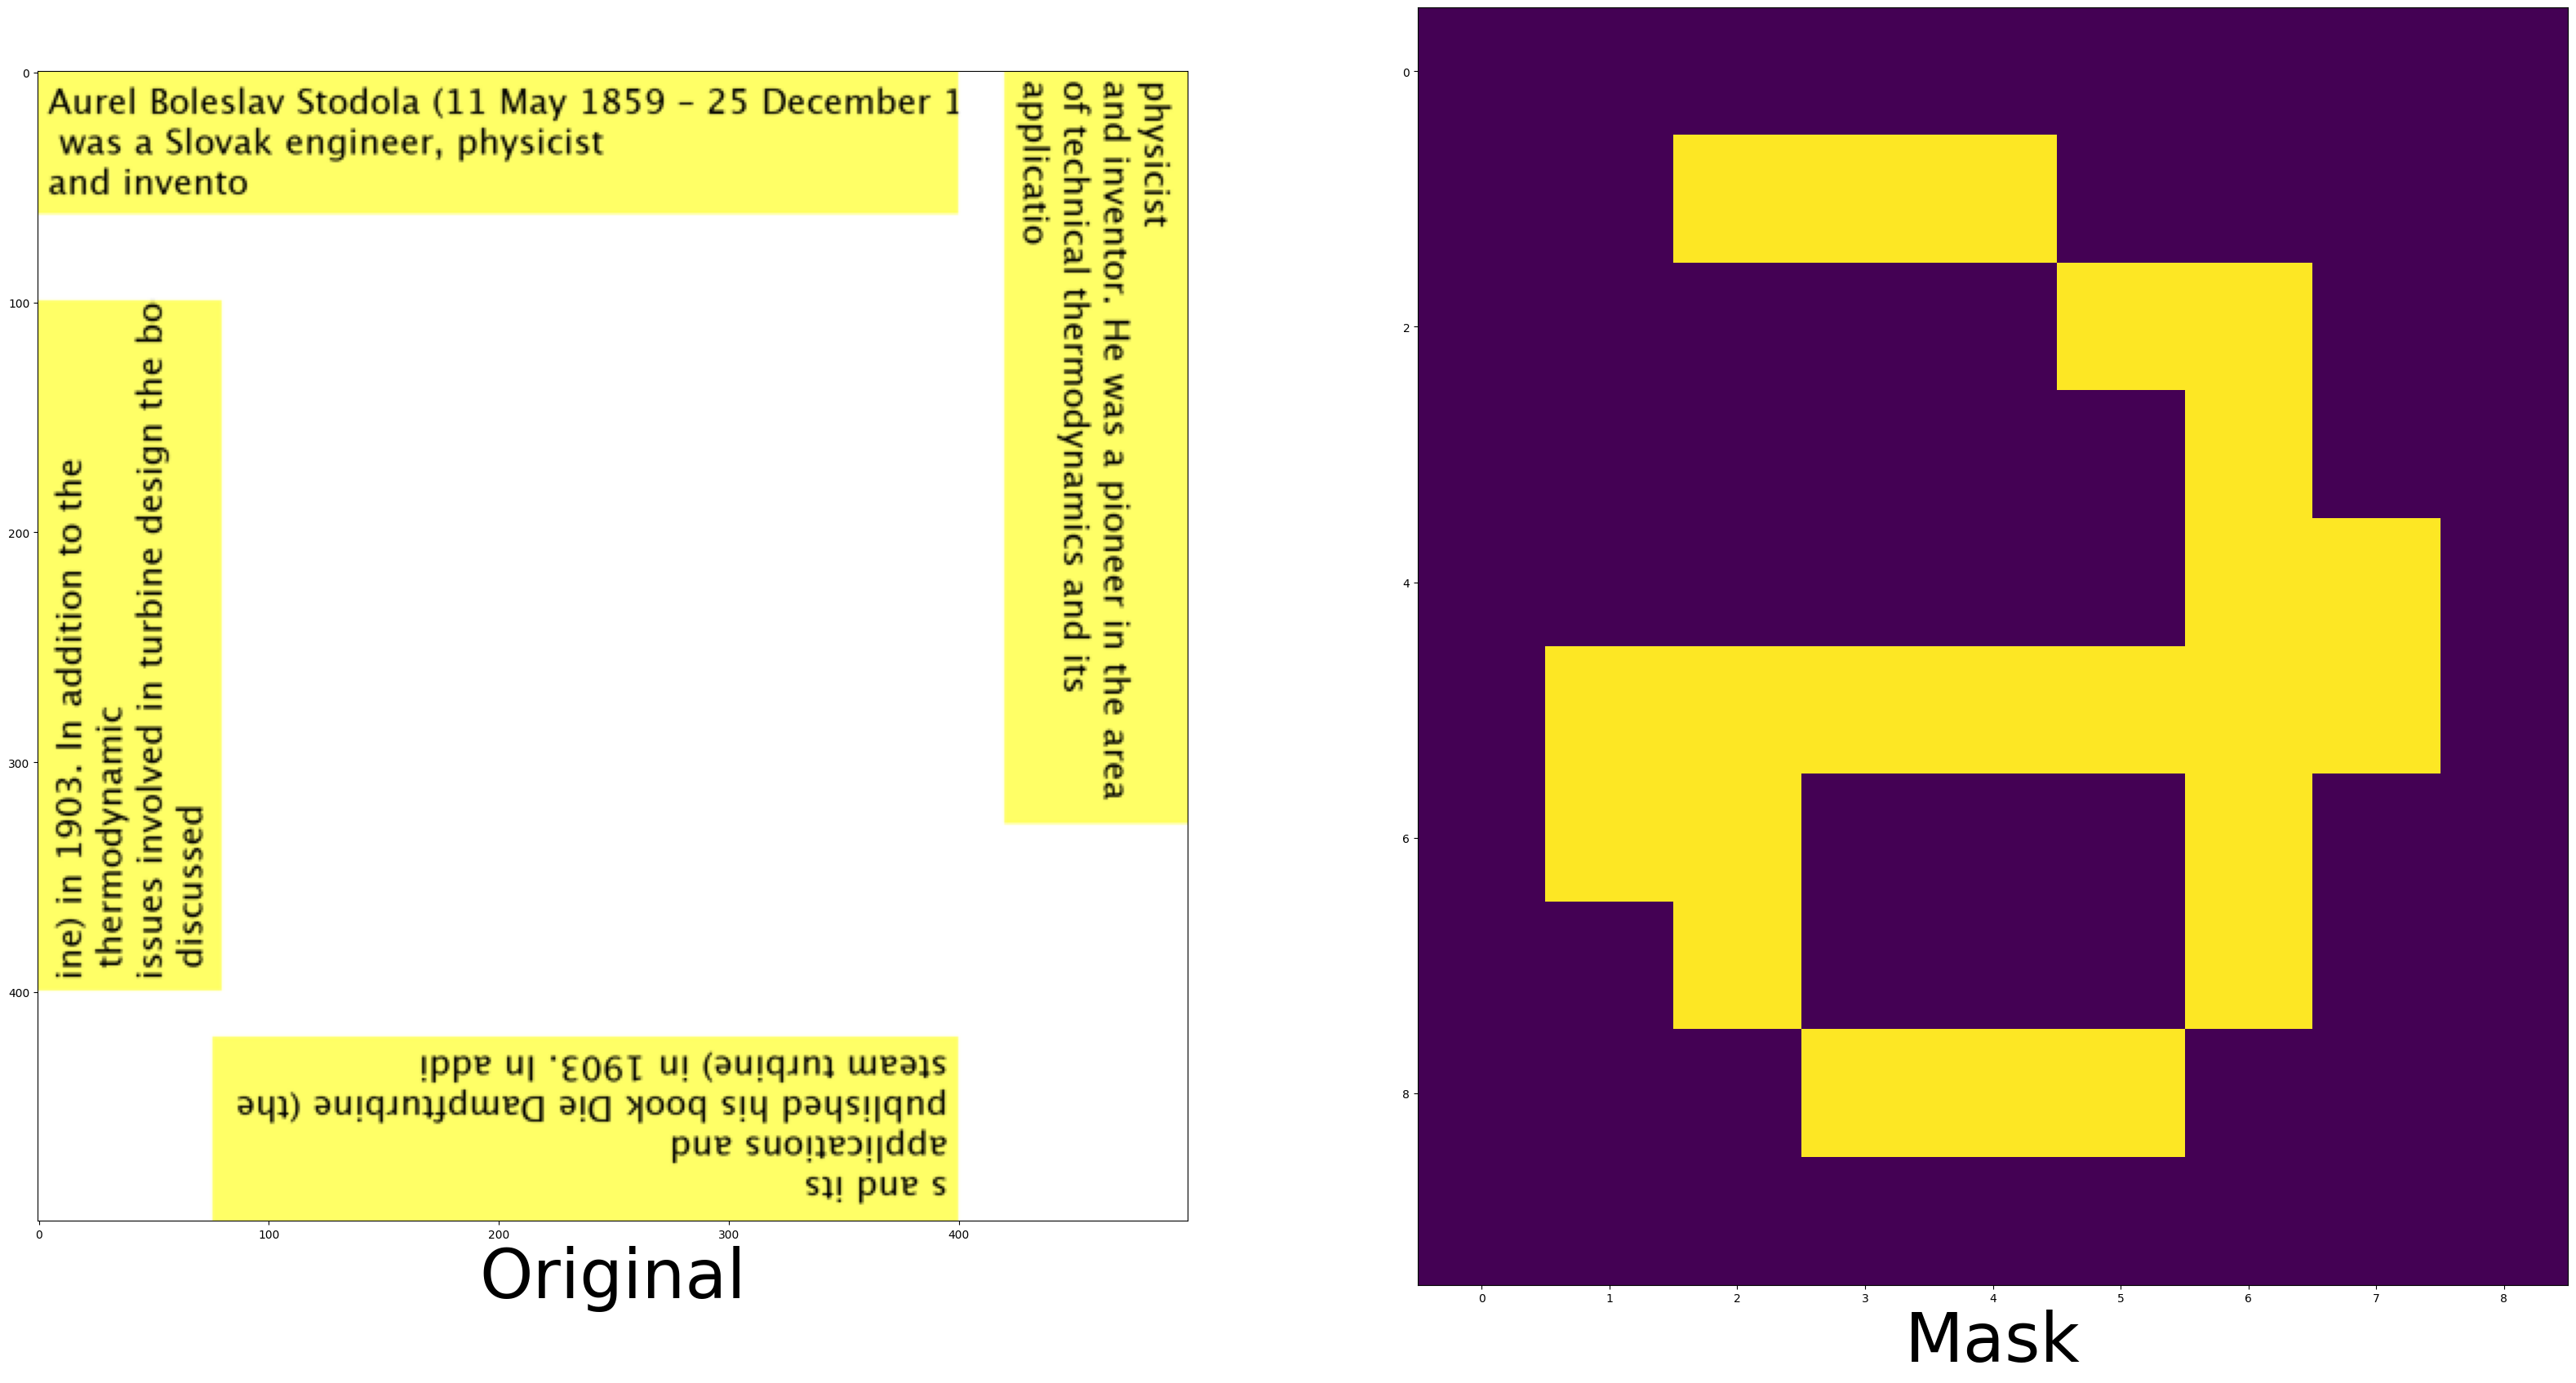

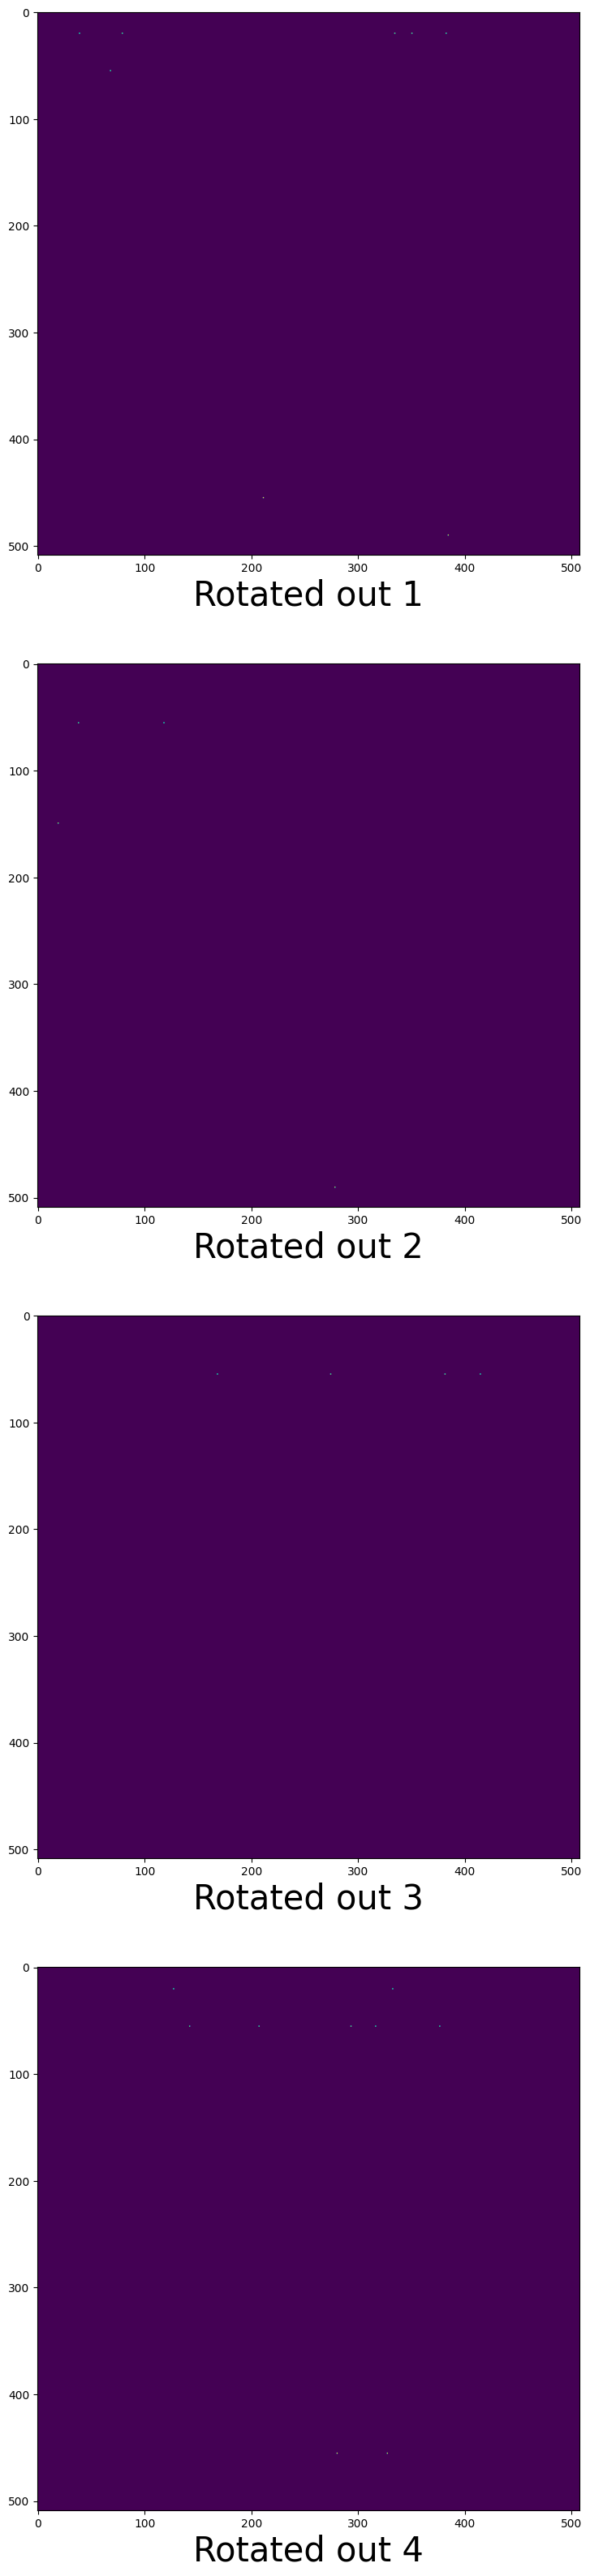

In [2]:
image = io.imread("words.png")
out = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray_b = cv2.GaussianBlur(gray, (3,3), 0)
adapted = exposure.equalize_adapthist(gray) < 0.35


plt.figure(figsize=(40,50))
plt.subplot(121)
plt.xlabel('Original', fontsize= 60)
plt.ylabel('')
plt.imshow(image)

kernel  = transform.rotate(adapted[10:20, 70:79],180)
adapted_kernel=exposure.equalize_adapthist(kernel) < 0.35


plt.subplot(122)
plt.xlabel('Mask', fontsize= 60)
plt.ylabel('')
plt.imshow(kernel)



text = transform.rotate(adapted, 360)
out1 = signal.convolve2d(text.astype(np.float64), adapted_kernel)

text=transform.rotate(adapted, 90)
out2 = signal.convolve2d(text.astype(np.float64), adapted_kernel)

text=transform.rotate(adapted, 180)
out3 = signal.convolve2d(text.astype(np.float64), adapted_kernel)

text=transform.rotate(adapted, 270)
out4 = signal.convolve2d(text.astype(np.float64), adapted_kernel)

plt.figure(figsize=(40,40))
plt.subplot(411)
plt.xlabel('Rotated out 1', fontsize= 30)
plt.ylabel('')
plt.imshow(out1>0.75*np.max(out1))
out1 = out1>0.75*np.max(out1)

plt.subplot(412)
plt.xlabel('Rotated out 2', fontsize= 30)
plt.ylabel('')
plt.imshow(out2>0.75*np.max(out2))
out2 = out2>0.75*np.max(out2)

plt.subplot(413)
plt.xlabel('Rotated out 3', fontsize= 30)
plt.ylabel('')
plt.imshow(out3>0.8*np.max(out3))
out3 = out3>0.75*np.max(out3)

plt.subplot(414)
plt.xlabel('Rotated out 4', fontsize= 30)
plt.ylabel('')
plt.imshow(out4>0.75*np.max(out4))
out4 = out4>0.75*np.max(out4)

counter = 0

for i in range(0, out.shape[1]):
    for j in range(0, out.shape[0]):
        if out1[i, j] == True:
            counter = counter + 1
        if out2[i, j] == True:
            counter = counter + 1
        if out3[i, j] == True:
            counter = counter + 1
        if out4[i, j] == True:
            counter = counter + 1

print("There are " + str(counter) + " 'e'")
